In [47]:
import sklearn
import nltk
import praw
import json
import pprint
import pandas as pd
import numpy as np
import re
from io import StringIO     

In [48]:
reddit = praw.Reddit(client_id='d82BgeGuxFNBlA', client_secret='Ddi18K33GxZoIJLXGPkqTRZiO3o',
                    password='Rohit295', user_agent='redrohit295',
                    username='redrohit295')


In [49]:
list_of_items = []
fields = ['title','subreddit_id']

ritreddit = reddit.subreddit('rit')
for submission in ritreddit.top(limit=500):
    to_dict = vars(submission)
    sub_dict = {field: to_dict[field] for field in fields}
    list_of_items.append(sub_dict)

In [50]:
with open('ritdata500.json', 'w') as f:
    json.dump(list_of_items, f)

In [51]:
list_of_items = []
fields = ['title','subreddit_id']

ritreddit = reddit.subreddit('christmas')
for submission in ritreddit.top(limit=500):
    to_dict = vars(submission)
    sub_dict = {field: to_dict[field] for field in fields}
    list_of_items.append(sub_dict)

In [52]:
with open('christmasdata500.json', 'w') as f:
    json.dump(list_of_items, f)


In [53]:
ritfile = 'ritdata500.json'
with open(ritfile) as rit_file:
    rit_dict = json.load(rit_file)

# converting json dataset from dictionary to dataframe
rit_df = pd.DataFrame.from_dict(rit_dict)
rit_df.reset_index(level=0, inplace=True)

In [54]:
chritmasfile = 'christmasdata500.json'
with open(chritmasfile) as chritmas_file:
    christmas_dict = json.load(chritmas_file)

# converting json dataset from dictionary to dataframe
christmas_df = pd.DataFrame.from_dict(christmas_dict)
christmas_df.reset_index(level=0, inplace=True)

In [55]:
data_df = pd.concat([rit_df,christmas_df])
data_df

,index,subreddit_id,title
0,0,t5_2qh3x,Roommate showed us how to clean our dishes
1,1,t5_2qh3x,My friends and I cleaning up the nature trail!...
2,2,t5_2qh3x,when you're on a rit meal plan
3,3,t5_2qh3x,Shoutout to The Den for offering different typ...
4,4,t5_2qh3x,college_students@rit.edu
5,5,t5_2qh3x,"RIT, mental health is no joke."
6,6,t5_2qh3x,A fight today in the Infinity Quad
7,7,t5_2qh3x,Saw this on the RIT memes page on Facebook.
8,8,t5_2qh3x,I was having a real bad Monday til I saw this ...
9,9,t5_2qh3x,RIT’s Ideal Student


In [56]:
data_df = data_df.replace('t5_2qh3x',0)
data_df = data_df.replace('t5_2qi2n',1)

In [57]:
from sklearn.utils import shuffle
data_df = shuffle(data_df)
data_df

,index,subreddit_id,title
201,201,0,rit_irl
295,295,1,It's that time of the year again. Happy Christ...
140,140,0,import turtle
328,328,0,RIT IRL
4,4,1,I posted a couple of hours ago that I could be...
270,270,1,Tree is up thanks to my helper
202,202,0,Gleason 4 is out of control
273,273,0,When you have Munson's signature on your degre...
55,55,1,My Fathers Amazing Christmas Village! Let's sh...
491,491,0,rit❄️irl


In [58]:
import numpy as np
X_train_array = np.array(X_train_counts)

In [59]:
labels = np.array(y_train)

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_df["title"], data_df["subreddit_id"], test_size=0.5, random_state=1)

X_test, X_dev, y_test, y_dev = train_test_split(X_test, y_test, test_size=0.5, random_state=1)

In [79]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_test_counts = count_vect.fit_transform(X_test)
X_test_counts.shape

(250, 893)

In [80]:
from sklearn.ensemble import RandomForestClassifier
text_clf_rfc = Pipeline([('vect', CountVectorizer(stop_words='english')),('tfidf', TfidfTransformer()),('clf-svm', RandomForestClassifier())])
_ = text_clf_rfc.fit(X_train, y_train)
predicted_rfc = text_clf_rfc.predict(X_test)
np.mean(predicted_rfc == y_test)

0.808

In [81]:
y_score = text_clf_svm.decision_function(X_test) 

from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.98


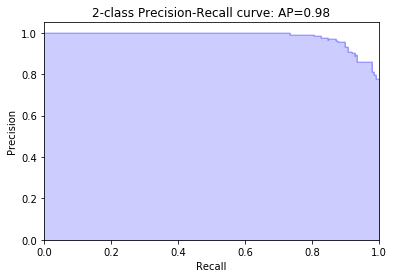

In [82]:
%matplotlib inline
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature

precision, recall, _ = precision_recall_curve(y_test, y_score)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

plt.show()

In [83]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
confusion_matrix(predicted_svm, y_test)

array([[56, 68],
       [55, 71]], dtype=int64)

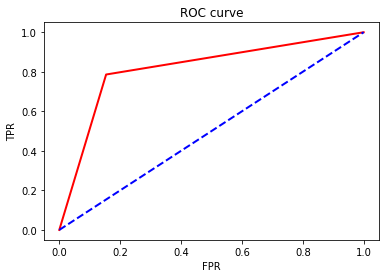

In [84]:
fpr, tpr,_=roc_curve(predicted_rfc, y_test,drop_intermediate=False)

import matplotlib.pyplot as plt
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()